# Draft

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime as dt

from sklearn import linear_model

jtplot.style(figsize=(15, 9))

<AxesSubplot:xlabel='Datetime'>

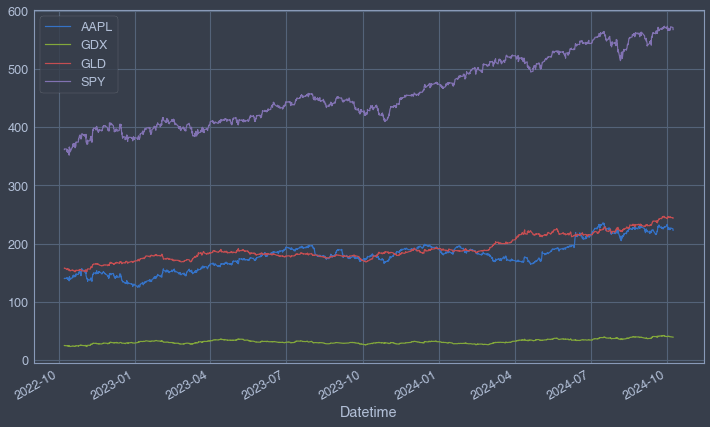

In [4]:
df = pd.read_csv('../../data/bt/gld_gdx_aapl_spy__1H.csv', parse_dates=True, header=[0, 1], index_col=0)
df.index = pd.to_datetime(df.index, utc=True)
df['Close'].plot()

In [5]:
symbol = 'GLD'
data = df['Close'][symbol].to_frame()
data.rename(columns={symbol: 'price'}, inplace=True)
data.head()

,price
Datetime,
2022-10-07 18:30:00+00:00,157.720001
2022-10-07 19:30:00+00:00,157.919998
2022-10-10 13:30:00+00:00,155.869995
2022-10-10 14:30:00+00:00,155.419998
2022-10-10 15:30:00+00:00,155.265106


In [6]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag) 
    cols.append(col)
data.dropna(inplace=True)

reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]
reg

array([ 1.00025472e+00,  1.18319417e-02, -7.21872806e-03, -1.79889147e-04,
       -4.55960808e-03])

In [7]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Datetime,,,,,,
2022-10-10 16:30:00+00:00,155.350006,155.265106,155.419998,155.869995,157.919998,157.720001
2022-10-10 17:30:00+00:00,155.470001,155.350006,155.265106,155.419998,155.869995,157.919998
2022-10-10 18:30:00+00:00,155.330002,155.470001,155.350006,155.265106,155.419998,155.869995
2022-10-10 19:30:00+00:00,155.449997,155.330002,155.470001,155.350006,155.265106,155.419998
2022-10-11 13:30:00+00:00,155.240005,155.449997,155.330002,155.470001,155.350006,155.265106


In [8]:
data['prediction'] = np.dot(data[cols], reg)

<AxesSubplot:xlabel='Datetime'>

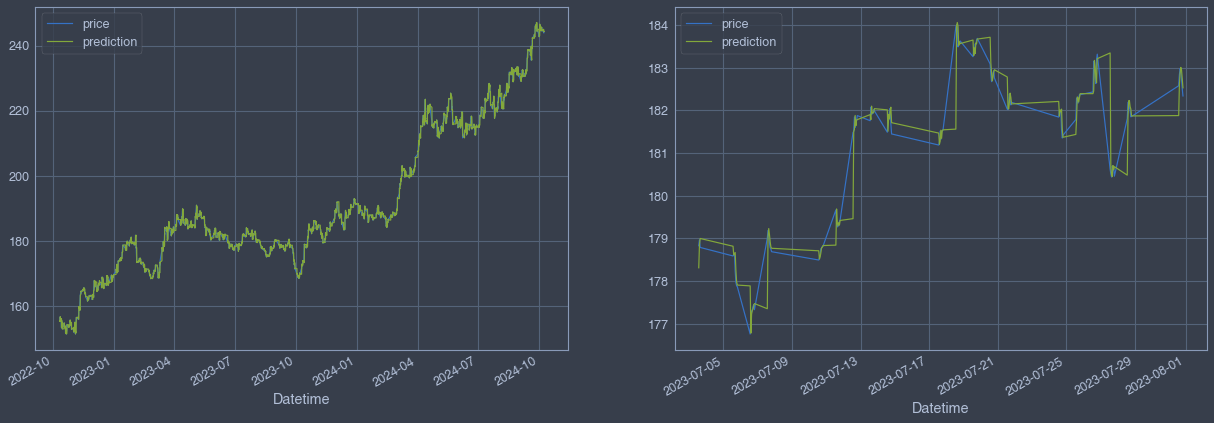

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
data[['price', 'prediction']].plot(ax=ax[0]);
data[['price', 'prediction']].loc['2023-07'].plot(ax=ax[1])

## Predicting Future Market Direction

In [9]:
data['return'] = np.log(data['price'] / data['price'].shift(1))
data.dropna(axis=0, inplace=True)

reg = np.linalg.lstsq(data[cols], np.sign(data['return']), rcond=None)[0]

data['prediction'] = np.sign(np.dot(data[cols], reg))  
data['prediction'].value_counts()

 1.0    3060
-1.0     420
Name: prediction, dtype: int64

In [10]:
hits = np.sign(data['return']*data['prediction']).value_counts()
hits

 1.0    1791
-1.0    1658
 0.0      31
dtype: int64

In [11]:
hits.values[0] / sum(hits)

0.5146551724137931

In [12]:
a = np.sign(data['return']*data['prediction'])
data.loc[a[a==0].index]

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Datetime,,,,,,,,
2022-10-17 15:30:00+00:00,154.679993,154.679993,154.750000,152.940002,152.895004,152.960007,1.0,0.0
2022-11-09 14:30:00+00:00,159.410004,159.410004,159.380005,159.199997,159.449997,159.460007,1.0,0.0
2022-11-15 20:30:00+00:00,165.539993,165.539993,165.100006,165.139999,164.764999,164.725006,1.0,0.0
2022-11-18 19:30:00+00:00,162.835007,162.835007,163.160004,163.070007,163.520004,163.485001,1.0,0.0
2022-11-29 17:30:00+00:00,162.889999,162.889999,162.875000,163.529999,161.949997,162.044998,1.0,0.0
2022-12-15 18:30:00+00:00,165.464996,165.464996,165.619995,165.330002,165.470001,168.089996,-1.0,0.0
2023-01-17 17:30:00+00:00,177.389999,177.389999,177.929993,177.759995,178.729996,178.649796,1.0,0.0
2023-03-02 17:30:00+00:00,170.550003,170.550003,170.755005,170.830002,170.809998,170.919907,1.0,0.0
2023-03-06 20:30:00+00:00,171.669998,171.669998,171.725006,171.889999,172.010101,172.011200,1.0,0.0


In [12]:
data['strategy'] = data['prediction'] * data['return']
data[['return', 'strategy']].sum().apply(np.exp)

return      1.570325
strategy    1.492950
dtype: float64

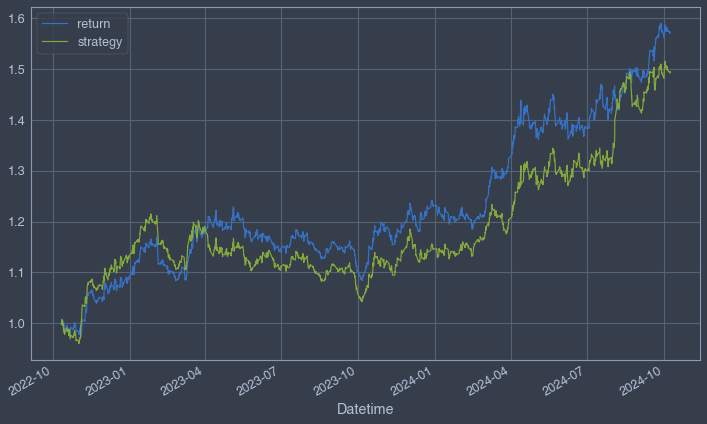

In [17]:
data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot();

In [13]:
from sklearn.metrics import accuracy_score

lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                     multi_class='auto',
                                     max_iter=1000)  

lm.fit(data[cols], np.sign(data['return']))

data['prediction LogRes'] = lm.predict(data[cols])  
data['prediction LogRes'].value_counts()

 1.0    2614
-1.0     866
Name: prediction LogRes, dtype: int64

In [15]:
data['strategy LogRes'] = data['prediction LogRes'] * data['return']
data[['return', 'strategy LogRes']].sum().apply(np.exp)

return             1.570325
strategy LogRes    1.186653
dtype: float64

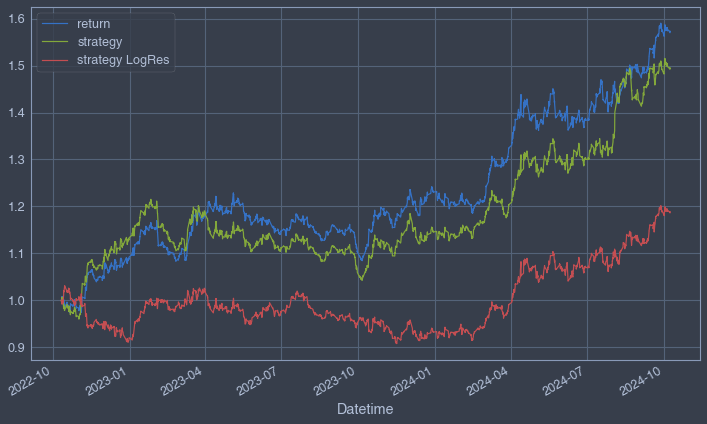

In [16]:
data[['return', 'strategy', 'strategy LogRes']].dropna().cumsum().apply(np.exp).plot();